## Read CSV files using Python

It is quite common in the field of data science to find data that has been formatted as csv files with rows and columns. This makes it a lot easier to read, analyse and process the data more effectively. Hence, manipulating a csv file using Python can prove to be a useful skill for deep learning, which also happens to be a branch of data science.

Create a csv file named "test.csv" for the purpose of this example

In [1]:
csv_file = './test.csv'

In [2]:
with open(csv_file, 'w') as file:  # 'w' -> open the file in write mode
    
    # The header in the csv file describing the columns
    header = ['Student_Name', 'Admin_No.']
    
    # the data rows
    data = [['studentA', '123456A'], ['studentB', '123457B'], ['studentC', '123458C']]
    
    # A one-line Python statement that does the following:
    #   1.    Join the strings in 'header' using ',' as a delimiter
    #         output: 'Student_Name,Admin_No.'
    #
    #   2. a) Join each row in 'data' using ',' as a delimiter, 
    #         with the use of list comprehensions
    #
    #   2. b) Join each row (that has been joined into a string) 
    #         using the newline character, '\n', as a delimiter
    #   
    #   3.    Join the results of steps 1 and 3 using the 
    #         newline character, '\n', as a delimiter and store it in 
    #         io_string
    io_string = ','.join(header) + '\n' + '\n'.join([ ','.join(row) for row in data ])
    
    # Write the final io_string to the csv file
    file.write(io_string)

Reading the file using Python's built-in file utility methods

In [3]:
lines = []
with open(csv_file, 'r') as file:   # 'r' -> open the file in read mode
    for line in file:               # iterate through the lines in file
        lines.append(line.strip())  # remove leading and trailing whitespace characters

In [4]:
lines

['Student_Name,Admin_No.',
 'studentA,123456A',
 'studentB,123457B',
 'studentC,123458C']

A much shorter way of performing the above using list comprehensions is shown below.
<br/>One can search for 'list comprehension python' on Google to learn more about list comprehensions in python

In [5]:
with open(csv_file, 'r') as file:
    lines = [line.strip() for line in file]  # List comprehension in action

In [6]:
lines

['Student_Name,Admin_No.',
 'studentA,123456A',
 'studentB,123457B',
 'studentC,123458C']

Split the data, read from the csv file, into header and rows

In [7]:
header = lines[0]  # The first row
rows = lines[1:]   # All the other rows

Split the headers and rows by column

In [8]:
header = header.split(',')
rows = [row.split(',') for row in rows]

In [9]:
header

['Student_Name', 'Admin_No.']

In [10]:
rows

[['studentA', '123456A'], ['studentB', '123457B'], ['studentC', '123458C']]

Let's do the above with 'pandas' instead

Import the 'pandas' module
<br/>If this module could not be found, install using conda, like so:
    
    conda install -c anaconda pandas -y

In [11]:
import pandas as pd

In [12]:
csv_data = pd.read_csv(csv_file)

Access the header

In [13]:
print(csv_data.columns)  # Returns an iterable object

Index(['Student_Name', 'Admin_No.'], dtype='object')


Access the rows

In [14]:
print(csv_data.get_values())

[['studentA' '123456A']
 ['studentB' '123457B']
 ['studentC' '123458C']]


As you can see, reading and accessing the header and rows of the csv_file uses very few lines of code with pandas

Although not covered in this documentation, you might also want to take a look at dictionary comprehensions in Python as well. List comprehensions and dictionary comprehensions help to create new lists and dictionaries respectively by manipulating items in the original list / dictionary.

## Preprocessing data (for CNNs)

For this project (in 2018/2019 Period 4), the task was to plot the bytecodes present in the "Microsoft Malware Classification Challenge (BIG 2015)" dataset into grayscale images. This section will walk through the steps taken to perform this, as it can be useful for a similar problem in the future.

__* Note that the bytecodes in the dataset had their PE (Portable Executable) Header removed, which means the bytecodes only contains hexadecimal representation of the data and text segments of the malware__

In [15]:
import os, itertools, traceback, logging
import numpy as np
from PIL import Image
from keras.preprocessing import image

Using TensorFlow backend.


The following are some utility functions that were created during the course of the project to aid in the process of plotting the bytecodes to grayscale images

In [16]:
def byte2img(filename):
    """
        - Plots given bytecode file (consisting hexadecimal numbers without the PE header) to grayscale images
        - params
            - filename - the path to the bytecode file to be converted
        - return
            - img - An instance of a PIL Image representing the converted grayscale image
    """
    try:
        with open(filename, 'r') as f:
            arr = []
            for line in f:
                vals = line.split()
                del vals[0]
                arr.append(vals)
            
            max_len = max([len(vals) for vals in arr])
            
            new_arr = []
            for vals in arr:
                new_arr.append([val.replace('?', '0') for val in vals])
            
            for vals in new_arr:
                if '?' in vals:
                    print(vals)
            
            hexstring = ''.join(list(itertools.chain.from_iterable(new_arr)))
            
            byte_arr = bytearray.fromhex(hexstring)
            width = 1024
            rem = len(byte_arr) % width
            byte_arr_len = len(byte_arr) - rem
            byte_arr = byte_arr[:byte_arr_len]
            byte_arr = np.asarray(byte_arr)
            np_arr = np.reshape(byte_arr, (len(byte_arr)//width, width))
            np_arr = np.uint8(np_arr)
            img = Image.fromarray(np_arr)
            return img
    except Exception as error:
        logging.error(traceback.format_exc())

In [17]:
def load_img_from_fs(filename):
    """
        - Loads an image from the filesystem
        - params
            - filename - the path to the image file to be loaded
        - return
            - An instance of a PIL Image representing the image loaded from the file system
    """
    try:
        img = image.load_img(filename, color_mode='grayscale')  # for older versions, use "grayscale=True" instead of "color_mode='grayscale'"
        return img
    except Exception as error:
        logging.error(traceback.format_exc())

In [18]:
def resize_from_file(filename, dest, size=(128, 128)):
    """
        - Resize an existing image from the filesystem to the specified size and save it back to the filesystem
        - params
            - filename - the path to the image file to be resized
            - dest - the path to the image file to write to (The directory should exist - The image need not exist)
            - size - the dimension to resize the image to in the format (width, height) - default is 128 by 128
        - return
            - None
    """
    try:
        imgname = os.path.basename(filename)
        img = image.load_img(filename, color_mode='grayscale')  # for older versions, use "grayscale=True" instead of "color_mode='grayscale'"
        img = img.resize(size, Image.LANCZOS)
        img.save(os.path.join(dest, imgname))
    except Exception as error:
        logging.error(traceback.format_exc())

Access the bytecodes (A sample of them have been extracted and included with this notebook for demonstration purposes)

In [19]:
bytecode_files_dir = './bytecodes/'  # The directory containing the bytecodes in question

In [20]:
byte_files = os.listdir(bytecode_files_dir)  # Store the names of all the bytecode files

In [21]:
byte_files  # Notice that the names include the name of the file and its extension

['02MRILoE6rNhmt7FUi45.bytes',
 '01kcPWA9K2BOxQeS5Rju.bytes',
 '02K5GMYITj7bBoAisEmD.bytes',
 '01jsnpXSAlgw6aPeDxrU.bytes',
 '01IsoiSMh5gxyDYTl4CB.bytes',
 '02IOCvYEy8mjiuAQHax3.bytes',
 '01SuzwMJEIXsK7A8dQbl.bytes',
 '01azqd4InC7m9JpocGv5.bytes',
 '02mlBLHZTDFXGa7Nt6cr.bytes',
 '02JqQ7H3yEoD8viYWlmS.bytes']

The method, `byte2img`, will be used to plot the contents of each bytecode onto a grayscale image of width 1024 pixels. This presentation by [Nataraj et al](https://vizsec.org/files/2011/Nataraj.pdf) is useful when it comes to decising the width of the image to aim for when plotting the bytecodes to images.

The size of each bytecode file is not the same. Hence, when plotting it onto an image with width 1024 pixels, naturally one can expect the resulting images to have different heights of each. However, when feeding these images to a neural network for deep learning purposes, the images have to be scaled down to a fixed size. As such, the images were just simply resized to a fixed dimension of 128 pixels by 128 pixels.

In [22]:
# Make use of byte2img to read in the bytecodes 
# and plot the content onto a grayscale image
plotted_images = [ byte2img(os.path.join(bytecode_files_dir, byte_file)) for byte_file in byte_files ]

In [23]:
# Extract out just the file names, without the extension and path
byte_file_names = [ os.path.splitext(byte_file)[0] for byte_file in byte_files ]

In [24]:
# The directory we will be creating to store the plotted images (of width 1024 pixels)
plotted_images_dir = './plotted_images'

In [25]:
# Create the directory if it does not exists
if not os.path.exists(plotted_images_dir):
    os.mkdir(plotted_images_dir)

In [26]:
# Save the images in the directory created above
for i, file_name in enumerate(byte_file_names):
    plotted_images[i].save(os.path.join(plotted_images_dir, file_name+'.png'))

In [27]:
# The directory we will be creating to store the resized images
resized_images_dir = './plotted_images_resized'

In [28]:
# Once again, create the directory if it does not exists
if not os.path.exists(resized_images_dir):
    os.mkdir(resized_images_dir)

In [29]:
# Resize each file to a fixed dimension of 128 pixels by 128 pixels
#
# The result of performing this operation will be the same as the result you will obtain 
# if you were to open this image in Microsoft Word and just resize the image without maintaining 
# its aspect ratio
#
# Note that the method, resize_from_file, will automatically save the resized image to the 
# directory we have specified as one of its parameters, which is the directory we had just created 
# in the previous cell of this notebook
for i, file_name in enumerate(byte_file_names):
    resize_from_file(os.path.join(plotted_images_dir, file_name+'.png'), resized_images_dir, size=(128, 128))

Let's take a look at the original image and the resized one

In [30]:
# Load the images from the filesystem
resized_images = [ load_img_from_fs(os.path.join(resized_images_dir, file_name+'.png')) for file_name in byte_file_names ]

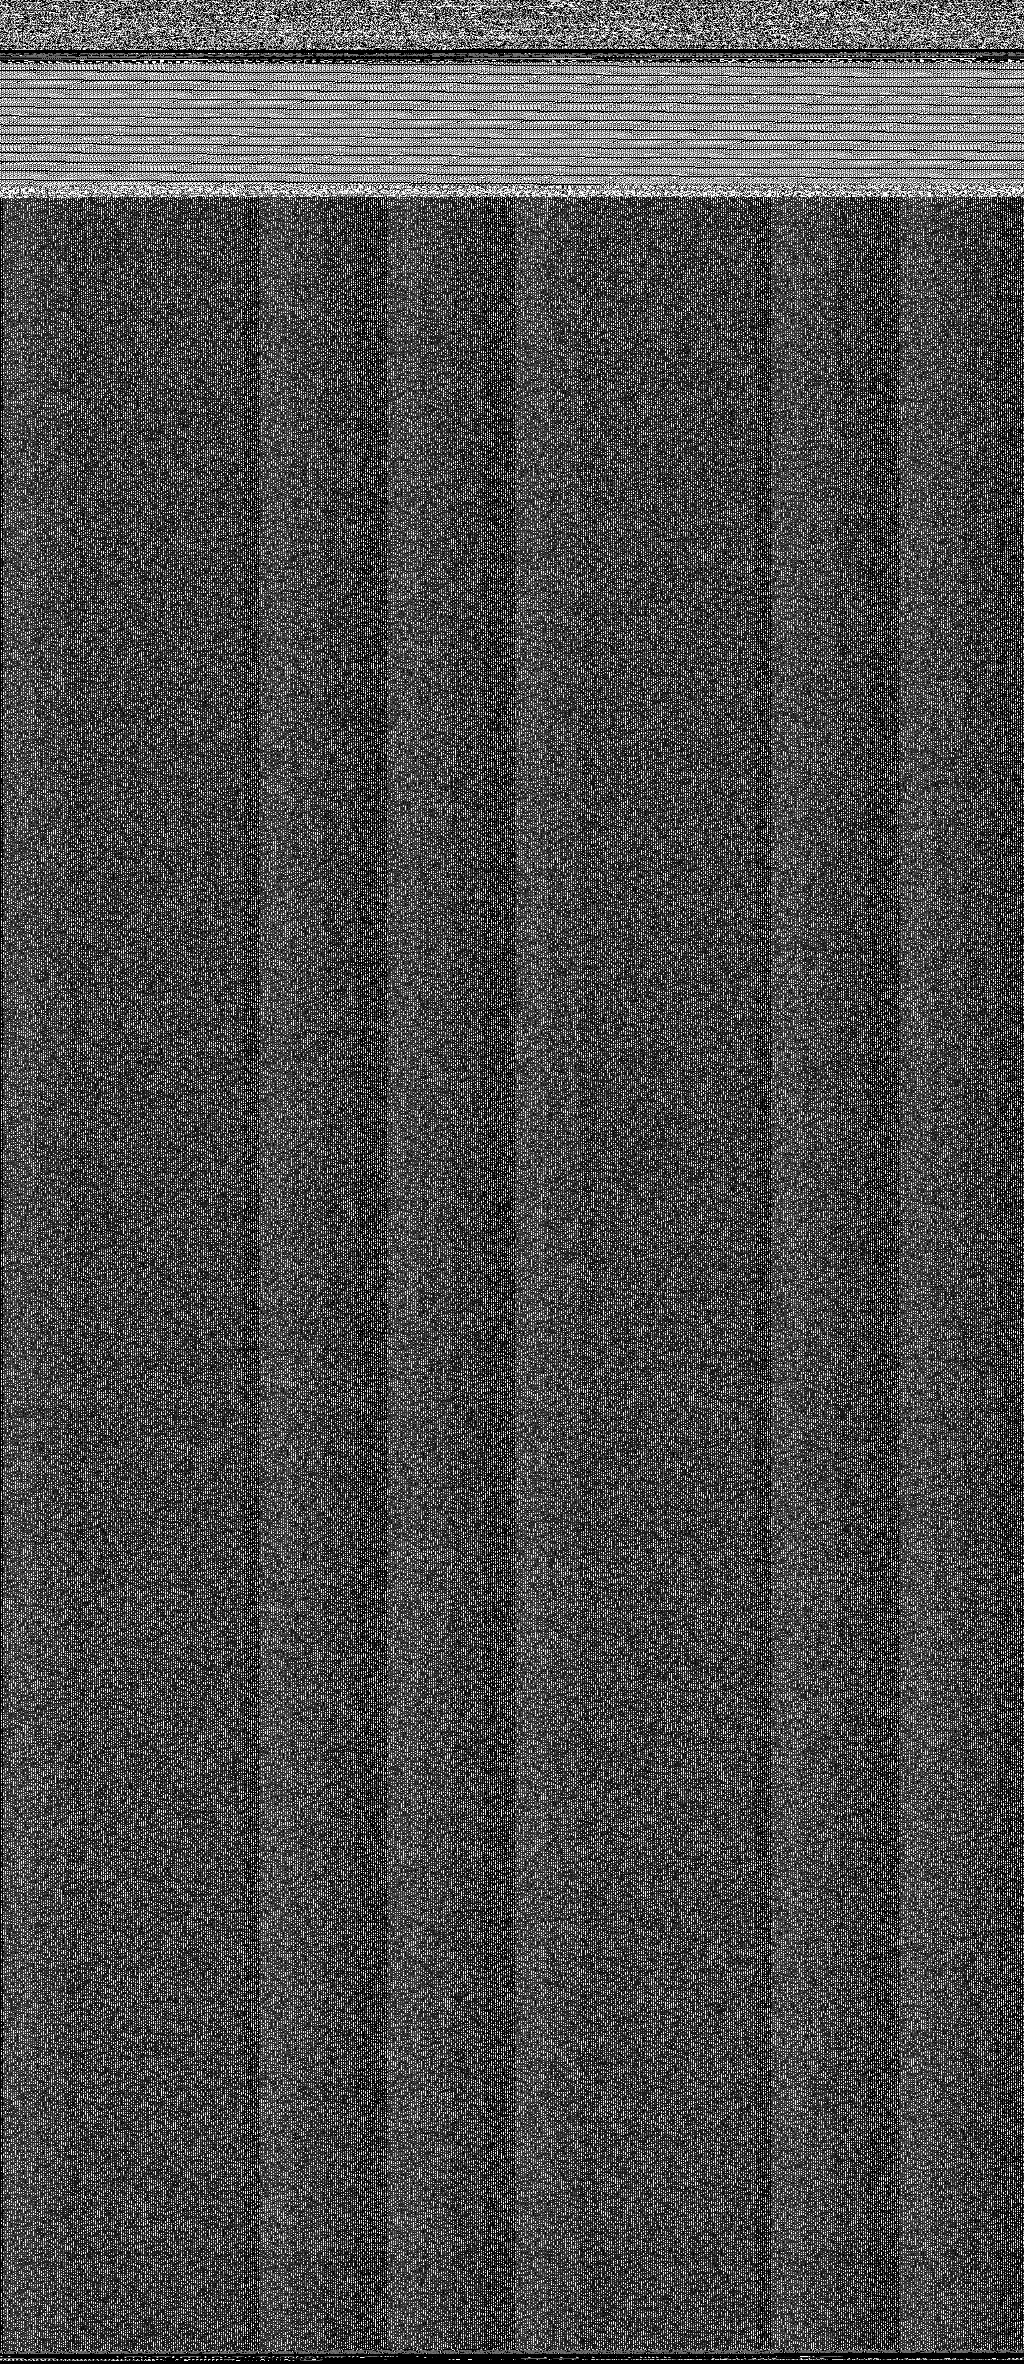

In [31]:
plotted_images[0]  # actual size

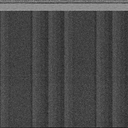

In [32]:
resized_images[0]  # actual size

In [33]:
import shutil

def clean_up():
    """
        This function can be run after looking through this entire documentation.
        The purpose of this function is to reset any changes made by this notebook. 
        (i.e. images saved, csv file created, etc.)
    """
    try:
        os.remove(csv_file)
        shutil.rmtree(plotted_images_dir)
        shutil.rmtree(resized_images_dir)
    except Exception as error:
        logging.error(traceback.format_exc())

In [34]:
# If you encounter any errors when running this cell, 
# please double check the contents of the folder 
# containing this notebook.
clean_up()